## Part 2: Analyze the data¶

1. Social Media Data Analysis     
2. Data Visualization 

### Social Media Data Analysis - For Public Tweets

Focus on analyzing:

    1. Most retweeted words
    2. IRCC tweets

In [1]:
# !python -m spacy download en_core_web_lg

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

In [3]:
#loading most_retweeted and ircc data to DataFrames
most_retweeted_df = pd.read_csv("most_retweeted.csv")
ircc_df = pd.read_csv("ircc_df.csv")

In [4]:
ircc_df.head()

,Unnamed: 0,User,Tweet
0,0,CitImmCanada,"@DenysProd 2/2 For case-specific information, ..."
1,1,CitImmCanada,@DenysProd 1/2 Hi. CUAET electronic visa appli...
2,2,CitImmCanada,"@eireenien 2/2 For case-specific information, ..."
3,3,CitImmCanada,@eireenien 1/2 Hi. CUAET electronic visa appli...
4,4,CitImmCanada,Our online services were recently unavailable....


In [5]:
most_retweeted_df.head()

,Unnamed: 0,Time,Retweets,User,Tweet
0,16,2022-04-26 13:00:01+00:00,37,Reuters,"Today, April 26, marks the 36th anniversary of..."
1,15,2022-04-26 13:01:10+00:00,36,Reuters,Russia's 'victory' in Mariupol turns city's dr...
2,6,2022-04-26 13:29:04+00:00,35,Reuters,Moscow accused NATO of engaging in a proxy bat...
3,17,2022-04-26 12:56:37+00:00,32,Reuters,Health authorities around the world are invest...
4,8,2022-04-26 13:20:19+00:00,29,Reuters,"Karachi blast kills three Chinese, including C..."


### 1. Public Tweets - Most Retweeted Words

In [6]:
#sentiment analysis
import matplotlib.pyplot as plt
import re
import spacy
nlp =  spacy.load('en_core_web_lg')
import seaborn as sns

In [7]:
#generating a list of sentences from the content of DataFrame most_retweeted_df
sentence_list = [sentence for sentence in most_retweeted_df.Tweet]
print(sentence_list)

['Today, April 26, marks the 36th anniversary of the Chornobyl nuclear disaster caused by a meltdown in a reactor in… https://t.co/ormVjw8qjH', "Russia's 'victory' in Mariupol turns city's dreams to rubble https://t.co/PkVcDXQyuY https://t.co/6VElufAFtd", 'Moscow accused NATO of engaging in a proxy battle against Russia by arming Ukraine, saying this had created a serio… https://t.co/smoaiSX3bn', 'Health authorities around the world are investigating a mysterious increase in severe cases of hepatitis - inflamma… https://t.co/4VXkAxlg1z', 'Karachi blast kills three Chinese, including Confucius centre head, and Pakistani https://t.co/Y84DloHEHu https://t.co/ekxykoBqIU', 'North Korea will speed up development of its nuclear arsenal, leader Kim Jong Un said while overseeing a huge milit… https://t.co/kDheiKFo15', 'A previously unreported account of a 36-hour chase in June 2020 offers a rare glimpse into how conservation group A… https://t.co/b5IhIZsKck', 'Second Ebola patient dies in north

In [8]:
#splitting the list of sentences to a list of sentences containing a list of words and putting 
#all the words collectively into one list.

word_lines = []
for sentence in sentence_list:
    #print("sentence: ", sentence)
    words = sentence.split()
    #print("words: ", words)
    for r in words:
        word_lines.append(r)

print("word_lines: ", word_lines)

word_lines:  ['Today,', 'April', '26,', 'marks', 'the', '36th', 'anniversary', 'of', 'the', 'Chornobyl', 'nuclear', 'disaster', 'caused', 'by', 'a', 'meltdown', 'in', 'a', 'reactor', 'in…', 'https://t.co/ormVjw8qjH', "Russia's", "'victory'", 'in', 'Mariupol', 'turns', "city's", 'dreams', 'to', 'rubble', 'https://t.co/PkVcDXQyuY', 'https://t.co/6VElufAFtd', 'Moscow', 'accused', 'NATO', 'of', 'engaging', 'in', 'a', 'proxy', 'battle', 'against', 'Russia', 'by', 'arming', 'Ukraine,', 'saying', 'this', 'had', 'created', 'a', 'serio…', 'https://t.co/smoaiSX3bn', 'Health', 'authorities', 'around', 'the', 'world', 'are', 'investigating', 'a', 'mysterious', 'increase', 'in', 'severe', 'cases', 'of', 'hepatitis', '-', 'inflamma…', 'https://t.co/4VXkAxlg1z', 'Karachi', 'blast', 'kills', 'three', 'Chinese,', 'including', 'Confucius', 'centre', 'head,', 'and', 'Pakistani', 'https://t.co/Y84DloHEHu', 'https://t.co/ekxykoBqIU', 'North', 'Korea', 'will', 'speed', 'up', 'development', 'of', 'its', 'nuc

In [9]:
#removing punctuations and fillers - to have only words with letters in them
word_lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in word_lines]
#print(word_lines)

word_lines_1 = []
for word in word_lines:
    if word != '':
        word_lines_1.append(word)
print("word_lines_1: ", word_lines_1)

word_lines_1:  ['Today', 'April', '26', 'marks', 'the', '36th', 'anniversary', 'of', 'the', 'Chornobyl', 'nuclear', 'disaster', 'caused', 'by', 'a', 'meltdown', 'in', 'a', 'reactor', 'in', 'httpstcoormVjw8qjH', 'Russias', 'victory', 'in', 'Mariupol', 'turns', 'citys', 'dreams', 'to', 'rubble', 'httpstcoPkVcDXQyuY', 'httpstco6VElufAFtd', 'Moscow', 'accused', 'NATO', 'of', 'engaging', 'in', 'a', 'proxy', 'battle', 'against', 'Russia', 'by', 'arming', 'Ukraine', 'saying', 'this', 'had', 'created', 'a', 'serio', 'httpstcosmoaiSX3bn', 'Health', 'authorities', 'around', 'the', 'world', 'are', 'investigating', 'a', 'mysterious', 'increase', 'in', 'severe', 'cases', 'of', 'hepatitis', 'inflamma', 'httpstco4VXkAxlg1z', 'Karachi', 'blast', 'kills', 'three', 'Chinese', 'including', 'Confucius', 'centre', 'head', 'and', 'Pakistani', 'httpstcoY84DloHEHu', 'httpstcoekxykoBqIU', 'North', 'Korea', 'will', 'speed', 'up', 'development', 'of', 'its', 'nuclear', 'arsenal', 'leader', 'Kim', 'Jong', 'Un', '

In [10]:
#identifying the base word (stem) of a set of words using the Natural Language Toolkit (NLTK)

from nltk.stem.snowball import SnowballStemmer

words1_stemmer = SnowballStemmer(language='english')

#creating a lis to store the base words(stems)
base_word = []
for word1 in word_lines_1:
    base_word.append(words1_stemmer.stem(word1))

print(base_word)

['today', 'april', '26', 'mark', 'the', '36th', 'anniversari', 'of', 'the', 'chornobyl', 'nuclear', 'disast', 'caus', 'by', 'a', 'meltdown', 'in', 'a', 'reactor', 'in', 'httpstcoormvjw8qjh', 'russia', 'victori', 'in', 'mariupol', 'turn', 'citi', 'dream', 'to', 'rubbl', 'httpstcopkvcdxqyuy', 'httpstco6velufaftd', 'moscow', 'accus', 'nato', 'of', 'engag', 'in', 'a', 'proxi', 'battl', 'against', 'russia', 'by', 'arm', 'ukrain', 'say', 'this', 'had', 'creat', 'a', 'serio', 'httpstcosmoaisx3bn', 'health', 'author', 'around', 'the', 'world', 'are', 'investig', 'a', 'mysteri', 'increas', 'in', 'sever', 'case', 'of', 'hepat', 'inflamma', 'httpstco4vxkaxlg1z', 'karachi', 'blast', 'kill', 'three', 'chines', 'includ', 'confucius', 'centr', 'head', 'and', 'pakistani', 'httpstcoy84dlohehu', 'httpstcoekxykobqiu', 'north', 'korea', 'will', 'speed', 'up', 'develop', 'of', 'it', 'nuclear', 'arsenal', 'leader', 'kim', 'jong', 'un', 'said', 'while', 'overse', 'a', 'huge', 'milit', 'httpstcokdheikfo15', '

In [11]:
#removing stop words from the base words, and putting the remaining base words (exluding stop words) in a list

base_word_no_stopWords = []

for word2 in base_word:
    if word2 not in nlp.Defaults.stop_words:
        base_word_no_stopWords.append(word2)

print(base_word_no_stopWords)

['today', 'april', '26', 'mark', '36th', 'anniversari', 'chornobyl', 'nuclear', 'disast', 'caus', 'meltdown', 'reactor', 'httpstcoormvjw8qjh', 'russia', 'victori', 'mariupol', 'turn', 'citi', 'dream', 'rubbl', 'httpstcopkvcdxqyuy', 'httpstco6velufaftd', 'moscow', 'accus', 'nato', 'engag', 'proxi', 'battl', 'russia', 'arm', 'ukrain', 'creat', 'serio', 'httpstcosmoaisx3bn', 'health', 'author', 'world', 'investig', 'mysteri', 'increas', 'sever', 'case', 'hepat', 'inflamma', 'httpstco4vxkaxlg1z', 'karachi', 'blast', 'kill', 'chines', 'includ', 'confucius', 'centr', 'head', 'pakistani', 'httpstcoy84dlohehu', 'httpstcoekxykobqiu', 'north', 'korea', 'speed', 'develop', 'nuclear', 'arsenal', 'leader', 'kim', 'jong', 'un', 'said', 'overse', 'huge', 'milit', 'httpstcokdheikfo15', 'previous', 'unreport', 'account', '36hour', 'chase', 'june', '2020', 'offer', 'rare', 'glimps', 'conserv', 'group', 'httpstcob5ihizskck', 'second', 'ebola', 'patient', 'die', 'northwestern', 'congo', 'httpstcoxiim6epqh

In [12]:
#Putting the resulting base words, without punctuations and stop words in a DataFrame
most_retweeted_base_df = pd.DataFrame(base_word_no_stopWords)
print(most_retweeted_base_df)

#getting counts for each word in the dataframe
retweeted_df_counts = most_retweeted_base_df[0].value_counts()
retweeted_df_counts

                      0
0                 today
1                 april
2                    26
3                  mark
4                  36th
..                  ...
212               revis
213              profit
214             guidanc
215  httpstco3xjkzsbgnx
216  httpstcoxh3hqcobh0

[217 rows x 1 columns]


nuclear               3
russia                3
mln                   2
citi                  2
creat                 2
                     ..
chase                 1
june                  1
2020                  1
offer                 1
httpstcoxh3hqcobh0    1
Name: 0, Length: 200, dtype: int64

### Data Visualization

C:\Users\jngai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


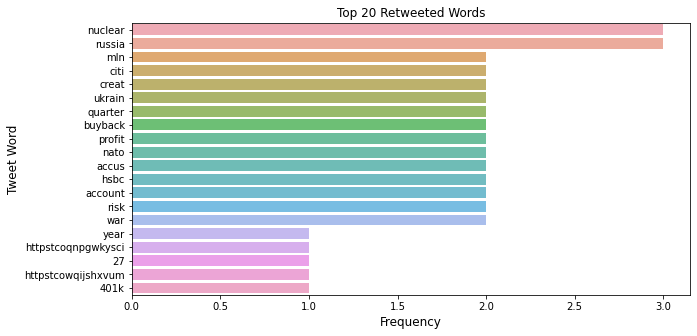

In [23]:
#Plotting a graph showing 20 top retweeted words
retweeted_df = retweeted_df_counts[:20,]
#retweeted_df.plot()

sns.set_palette("pastel")

plt.figure(figsize=(10,5))
sns.barplot(retweeted_df.values, retweeted_df.index, alpha=0.8)
plt.title('Top 20 Retweeted Words')
plt.ylabel('Tweet Word', fontsize=12)
plt.xalabel('Frequency', fontsize=12)
plt.show()

References:    

https://seaborn.pydata.org/tutorial/categorical.html   
https://www.codecademy.com/article/seaborn-design-ii   
https://www.youtube.com/watch?v=bNDRiaFyLrs&t=820s     
https://www.coursera.org/learn/social-media-data-analytics    
https://www.youtube.com/watch?v=FmbEhKSpR7M&t=330s   
https://www.youtube.com/watch?v=uPKnSq6TaAk    